In [1]:
from src.data.get_data_coinglass import load_data_for_exchange_pair, compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics, calculate_max_drawdown, analyze_venue_switching_strategy




# Example usage
api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-01-01"
end_date = "2024-12-31"
limit = 1000
interval = "4h"

api = CoinGlassAPI(api_key)



In [3]:

# Load BTC data (Here from Binance)


btc_data = load_data_for_exchange_pair(api, "Binance", "BTCUSDT",  "Binance", "BTCUSDT", start_date,end_date,interval,limit, True)





print(btc_data)

# Load ETH data

eth_data = load_data_for_exchange_pair(api, "Binance", "ETHUSDT",  "Binance", "ETHUSDT", start_date,end_date,interval,limit, True)



print(eth_data)


                   date   timestamp  closePrice spot_exchange spot_symbol  \
0   2024-10-25 20:00:00  1729886400    66698.33       Binance     BTCUSDT   
1   2024-10-26 00:00:00  1729900800    66914.00       Binance     BTCUSDT   
2   2024-10-26 04:00:00  1729915200    67007.99       Binance     BTCUSDT   
3   2024-10-26 08:00:00  1729929600    67138.00       Binance     BTCUSDT   
4   2024-10-26 12:00:00  1729944000    66886.49       Binance     BTCUSDT   
..                  ...         ...         ...           ...         ...   
392 2024-12-30 04:00:00  1735531200    93731.65       Binance     BTCUSDT   
393 2024-12-30 08:00:00  1735545600    93923.14       Binance     BTCUSDT   
394 2024-12-30 12:00:00  1735560000    92130.21       Binance     BTCUSDT   
395 2024-12-30 16:00:00  1735574400    94417.04       Binance     BTCUSDT   
396 2024-12-30 20:00:00  1735588800    92792.05       Binance     BTCUSDT   

     fundingRate perp_exchange perp_symbol  
0       0.004740       Binance

In [4]:
import pandas as pd

exchanges = ['Binance', 'Bybit', 'OKX']
include_list =  ['BTC', 'ETH']
exclude_list = ['XBT/USD', 'XBT/USD', 'BTC-USD', 'ETH-USD', 'BTC_USD', 'ETH_USD', 'ETH/USD'] #exclude weorg instrument, keep USDT feeds, why kraken uses XBT for BTC ticker i dunno but fuck them
ticker_map_spot = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list) #get tickers for spot
ticker_map_futures = CoinGlassAPI(api_key).get_supported_tickers(
    include_list, exclude_list, futures=True
) #get tickers for futures

df_ticker_spot = ticker_map_spot.rename(columns={'instrumentId': 'spotInstrumentId'})
print(df_ticker_spot)
df_ticker_spot.to_csv("ticker_map_spot.csv", index=False)
df_ticker_futures = ticker_map_futures.rename(columns={'instrumentId': 'futuresInstrumentId'})
print(df_ticker_futures)
df_ticker_futures.to_csv("ticker_map_futures.csv", index=False)

# merged_ticker_df = pd.merge(df_ticker_spot, df_ticker_futures, on=['exchange', 'baseAsset'], how='outer')

# # WIP, keep only perps tickers, remove futures tickers
# print(merged_ticker_df)
# for _, row in ticker_map.iterrows():
#     exchange = row['exchange']
#     ticker = row['instrumentId']
    
#     print(f"Ticker for {exchange}: {ticker}")
    
#     if ticker:
#         df = compute_funding_performance(
#             api_key=api_key,
#             symbol=ticker,
#             start_str=start_date,
#             end_str=end_date,
#             interval=interval,
#             limit=1000,
#             exchanges=[exchange],
#             position_size=1
#         )
#         print(df.head())





      exchange baseAsset spotInstrumentId
0      Binance       BTC          BTCUSDT
1      Binance       ETH          ETHUSDT
2     Bitfinex       BTC           BTCUSD
3     Bitfinex       ETH           ETHUSD
4        Bybit       BTC          BTCUSDT
5        Bybit       ETH          ETHUSDT
6     Coinbase       BTC         BTC-USDT
7     Coinbase       ETH         ETH-USDT
8   Crypto.com       BTC         BTC_USDT
9   Crypto.com       ETH         ETH_USDT
10      Kraken       ETH         ETH/USDT
11      Kraken       BTC         XBT/USDT
12         OKX       BTC         BTC-USDT
13         OKX       ETH         ETH-USDT
     exchange baseAsset futuresInstrumentId
0     Binance       BTC         BTCUSD_PERP
1     Binance       BTC       BTCUSD_250627
2     Binance       BTC       BTCUSD_250926
3     Binance       ETH         ETHUSD_PERP
4     Binance       ETH       ETHUSD_250627
..        ...       ...                 ...
178       OKX       ETH     ETH-USDT-250926
179       OKX     

In [5]:
base_asset = "BTCUSDT"
start_str = "2023-01-01"
end_str = "2024-12-31"
position_size = 1  # Example
limit = 1000
interval = "4h"

# Compute performance across exchanges
performance_df = compute_funding_performance_multi_exchange(
    api_key, 
    start_str, 
    end_str, 
    interval, 
    limit, 
    position_size
)

performance_df.to_csv("carry_performance.csv", index=False)

if not performance_df.empty:
    # Calculate performance metrics
    metrics_df = calculate_performance_metrics(performance_df, interval)
    print("\nPerformance Metrics by Exchange Pair:")
    print(metrics_df)
    
    # Analyze venue switching strategy
    switching_analysis = analyze_venue_switching_strategy(metrics_df)
    print("\nVenue Switching Analysis:")
    print(switching_analysis)
    
    # Save results
    performance_df.to_csv(f'{base_asset}_carry_performance.csv', index=False)
    metrics_df.to_csv(f'{base_asset}_carry_metrics.csv', index=False)
    switching_analysis.to_csv(f'{base_asset}_venue_switching_analysis.csv', index=False)


Processing perpetual futures on Binance for BTCUSDT
Pairing with spot data from Binance for BTCUSDT
Pairing with spot data from Bitfinex for BTCUSD
Pairing with spot data from Bybit for BTCUSDT
Pairing with spot data from Coinbase for BTC-USDT
Pairing with spot data from Crypto.com for BTC_USDT
Pairing with spot data from Kraken for XBT/USDT
Pairing with spot data from OKX for BTC-USDT

Processing perpetual futures on Binance for ETHUSDT
Pairing with spot data from Binance for ETHUSDT
Pairing with spot data from Bitfinex for ETHUSD
Pairing with spot data from Bybit for ETHUSDT
Pairing with spot data from Coinbase for ETH-USDT
Pairing with spot data from Crypto.com for ETH_USDT
Pairing with spot data from Kraken for ETH/USDT
Pairing with spot data from OKX for ETH-USDT

Processing perpetual futures on BingX for BTC-USDT
Pairing with spot data from Binance for BTCUSDT
Pairing with spot data from Bitfinex for BTCUSD
Pairing with spot data from Bybit for BTCUSDT
Pairing with spot data fro

TypeError: Could not convert ['BinanceBinanceBinanceBinance' 'BTCUSDTBTCUSDTETHUSDTETHUSDT'
 'BinanceBingXBinanceBingX' 'BTCUSDTBTC-USDTETHUSDTETH-USDT'] to numeric

Calculate Strategy Statistics


Carry Trade Performance Summary:
Total Return: 98.51%
Annualized Return: 1513.17%
Volatility: 448.60%
Sharpe Ratio: 3.37
Maximum Drawdown: -1.03%
Funding Return: 98.51%
Spot Return: 0.00%
Period: 2023-12-10 00:00:00 to 2024-03-09 00:00:00 (90 days)


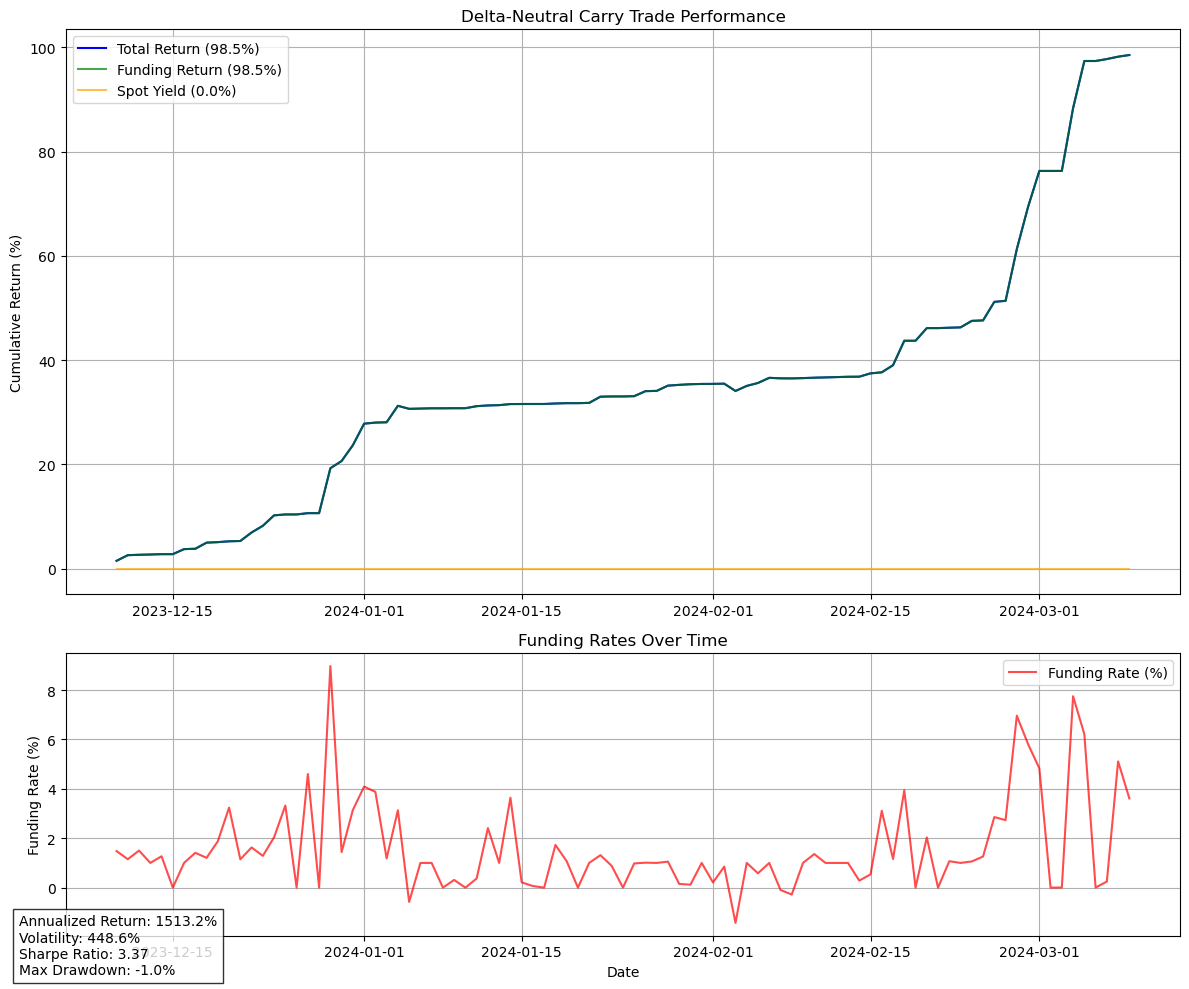

In [2]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair, compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd


# Example usage:
# Assuming you have already run your merge_and_compute_carry_trade and calculate_period_statistics functions

# Read and prepare data
spot_df = pd.read_csv('data/concat/spots_data_2023-12-10_to_2024-03-10.csv')
futures_df = pd.read_csv('data/concat/futures_data_2023-12-10_to_2024-03-10.csv')

# Convert date columns to datetime
spot_df['date'] = pd.to_datetime(spot_df['date'])
futures_df['date'] = pd.to_datetime(futures_df['date'])

# Compute carry trade performance
merged_df = merge_and_compute_carry_trade(spot_df, futures_df, merge_on='timestamp')
stats = calculate_period_statistics(merged_df)

# Print summary statistics
print("\nCarry Trade Performance Summary:")
print(f"Total Return: {stats['total_return_pct']:.2f}%")
print(f"Annualized Return: {stats['annualized_return_pct']:.2f}%")
print(f"Volatility: {stats['volatility_pct']:.2f}%")
print(f"Sharpe Ratio: {stats['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {stats['max_drawdown_pct']:.2f}%")
print(f"Funding Return: {stats['funding_return_pct']:.2f}%")
print(f"Spot Return: {stats['spot_return_pct']:.2f}%")
print(f"Period: {stats['start_date']} to {stats['end_date']} ({stats['days']} days)")

# Plot the results
plot_carry_trade_performance(merged_df, stats)

